# The Perceptron algorithm at work

## Example 1 (Manual work):
In this notebook, we will look in detail at the Perceptron algorithm for learning a linear classifier in the case of binary labels.

## The algorithm

This first procedure, **evaluate_classifier**, takes as input the parameters of a linear classifier (`w,b`) as well as a data point (`x`) and returns the prediction of that classifier at `x`.

The prediction is:
* `1`  if `w.x+b > 0`
* `0`  if `w.x+b = 0`
* `-1` if `w.x+b < -1`

In [1]:
def evaluate_classifier(w,b,x):
    if (np.dot(w,x) + b) > 0:
        return 1
    if (np.dot(w,x) + b) <= 0:
        return -1
    return 0

Here is the Perceptron training procedure. It is invoked as follows:
* `w,b,converged = train_perceptron(x,y,n_iters)`

where
* `x`: n-by-d numpy array with n data points, each d-dimensional
* `y`: n-dimensional numpy array with the labels (each 1 or -1)
* `n_iters`: the training procedure will run through the data at most this many times (default: 100)
* `w,b`: parameters for the final linear classifier
* `converged`: flag (True/False) indicating whether the algorithm converged within the prescribed number of iterations

If the data is not linearly separable, then the training procedure will not converge.

In [2]:
def train_perceptron(x,y,n_iters=100):
    n,d = x.shape
    w = np.zeros((d,))
    b = 0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    
    while not(done):
        done = True # when no point is misclassified, exits the while loop
        I = np.random.permutation(n)
        for i in range(n): # runs through the entire dataset
            j = I[i]
            if (evaluate_classifier(w,b,x[j,:]) != y[j]):
                w = w + y[j] * x[j,:]
                b = b + y[j]
                done = False # when a point is misclassified, stays in the while loop after incrementing 'iters'
                
        iters = iters + 1 # increments each time (w,b) gets updated
        if iters > n_iters:
            done = True
            converged = False
            
    if converged:
        print "Perceptron algorithm: iterations until convergence: ", iters
    else:
        print "Perceptron algorithm: did not converge within the specified number of iterations"
    return w, b, converged

## Experiments with the Perceptron

We start with standard includes.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain the two-dimensional data files, `data_1.txt` and `data_2.txt`. These files contain one data point per line, along with a label, like:
* `3 8 1` (meaning that point `x=(3,8)` has label `y=1`)

The next procedure, **run_perceptron**, loads one of these data sets, learns a linear classifier using the Perceptron algorithm, and then displays the data as well as the boundary.

In [25]:
# Look at Sebastian Raschka - Python Machine Learning, page 31 for reference
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Run the Perceptron algorithm for at most 100 iterations
    w,b,converged = train_perceptron(x,y,100)
    
    # Determine the min/max values of features (x1 and x2) for the plot
    # And use those feature vectors to create a pair of grid arrays xx1 and xx2 below
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    
    # Construct a grid of points at which to evaluate the classifier
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing)) # https://www.geeksforgeeks.org/numpy-meshgrid-function/
        print (xx1.shape)
        print (xx2.shape)
        
        grid = np.c_[xx1.ravel(), xx2.ravel()] #to flatten the grid arrays and create a matrix that has the same number of columns as training dataset
        print (grid.shape)
        
        Z = np.array([evaluate_classifier(w,b,pt) for pt in grid])
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape) #  reshaping the predicted class labels Z into a grid with the same dimensions as xx1 and xx2
        print (Z.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()

Let's run this on `data_1.txt`. Try running it a few times; you should get slightly different outcomes, because of the randomization in the learning procedure.

Perceptron algorithm: iterations until convergence:  6
(220, 220)
(220, 220)
(48400, 2)
(220, 220)


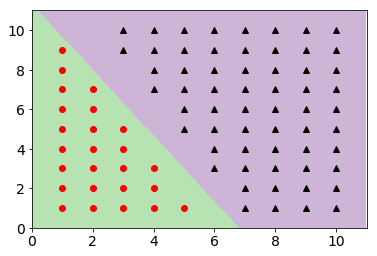

In [26]:
run_perceptron('data_1.txt')

And now, let's try running it on `data_2.txt`. *What's going on here?*

Perceptron algorithm: did not converge within the specified number of iterations


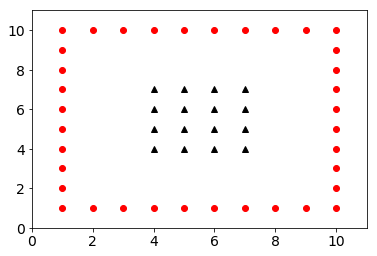

In [6]:
run_perceptron('data_2.txt')

## Example 2 (Faster way):
Here, we use a perceptron algorithm to classify the `iris dataset`. Here the number of labels is 3.

In [89]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [92]:
# Load the iris dataset
iris = datasets.load_iris()

# Create our X and y data
X = iris.data
y = iris.target

# View the first five observations of our x data
print (X[:5])
# View the first five observations of our y data
print
print (y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [79]:
# Split the data into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train A Perceptron Learner
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the perceptron
ppn.fit(X_train, y_train)

# Apply The Trained Learner To Test Data
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test)

# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# or just use
ppn.score(X_test, y_test)

Accuracy: 0.763


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.7631578947368421

## Preprocessing the data to improve model accuracy

In [80]:
# Preprocess The X Data By Scaling
# Train the scaler, which standarizes all the features to have mean = 0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [81]:
# Train A Perceptron Learner
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the perceptron
ppn.fit(X_train_std, y_train)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [82]:
# Apply The Trained Learner To Test Data
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred2 = ppn.predict(X_test_std)

# Compare The Predicted Y With The True Y
# View the predicted y test data
print y_pred2
print 
# View the true y test data
print y_test

[2 0 0 1 2 1 1 2 0 2 0 2 1 0 1 0 1 0 0 2 0 2 1 2 1 0 0 2 0 1 0 1 1 0 0 0 0
 0]

[2 0 0 2 2 1 1 2 0 2 0 2 1 0 1 0 1 0 0 2 0 2 1 2 1 0 1 2 0 1 0 1 1 0 0 0 0
 0]


In [83]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))
print('Accuracy before preprocessing: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.947
Accuracy before preprocessing: 0.763
